In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns

# Base directory where the dataset is mounted
base_dir = "/kaggle/input/sicapv2"

# Check directory structure
for root, dirs, files in os.walk(base_dir):
    print(f"{root} -> {len(files)} files")


/kaggle/input/sicapv2 -> 0 files
/kaggle/input/sicapv2/SICAPv2 -> 0 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2 -> 2 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/images -> 18783 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/partition -> 0 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/partition/Validation -> 0 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/partition/Validation/Val3 -> 4 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/partition/Validation/Val4 -> 4 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/partition/Validation/Val2 -> 4 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/partition/Validation/Val1 -> 4 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/partition/Test -> 4 files
/kaggle/input/sicapv2/SICAPv2/SICAPv2/masks -> 18783 files


In [2]:
import os

image_dir = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/images"
print("Files in images dir:", os.listdir(image_dir)[:5])


Files in images dir: ['16B0006669_Block_Region_24_6_2_xini_14275_yini_13598.jpg', '18B0005230E_Block_Region_5_11_23_xini_38257_yini_96363.jpg', '18B0006621D_Block_Region_2_1_13_xini_21582_yini_66086.jpg', '18B0006177A_Block_Region_2_6_19_xini_51693_yini_147491.jpg', '16B0022612_Block_Region_1_20_12_xini_15667_yini_92428.jpg']


Total images found: 18783
✅ Found matching image + mask for: 17B0016566_Block_Region_2_19_29_xini_35319_yini_66119.jpg
Image shape: (512, 512, 3)
Mask shape: (512, 512)
Unique values in mask: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127]


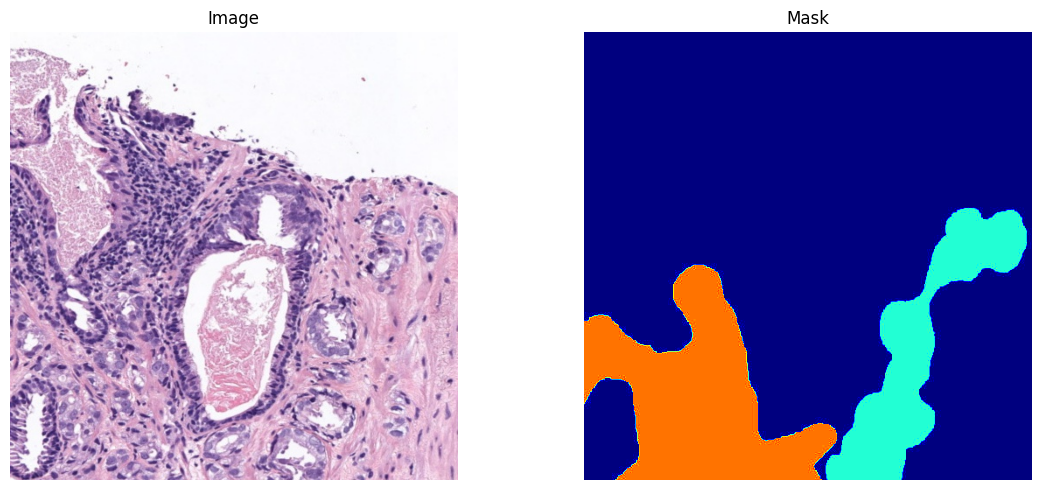

In [3]:
import random
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

# Correct image and mask directories
image_dir = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/images"
mask_dir = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/masks"

# Get list of image files
image_paths = glob(os.path.join(image_dir, "*.jpg"))
print(f"Total images found: {len(image_paths)}")

# Try loading image-mask pair
for _ in range(20):
    sample_image_path = random.choice(image_paths)
    filename = os.path.basename(sample_image_path)
    sample_mask_path = os.path.join(mask_dir, filename)  # No extension change now

    if os.path.exists(sample_mask_path):
        print("✅ Found matching image + mask for:", filename)
        break
else:
    raise FileNotFoundError("No matching masks found for any image.")

# Load image and mask
image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = cv2.imread(sample_mask_path, cv2.IMREAD_GRAYSCALE)

# Print some sanity info
print("Image shape:", image.shape)
print("Mask shape:", mask.shape)
print("Unique values in mask:", np.unique(mask))

# Show image and mask
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mask, cmap='jet')
plt.title("Mask")
plt.axis("off")

plt.tight_layout()
plt.show()


In [4]:
import pandas as pd

# Path to Excel label file
xlsx_path = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/wsi_labels.xlsx"

# Read Excel
df = pd.read_excel(xlsx_path)

# Your GG logic
def gleason_to_gg(primary, secondary):
    total = primary + secondary
    if total == 7 and primary == 4:
        return "GG3"
    elif total == 8:
        return "GG4"
    elif total >= 9:
        return "GG5"
    else:
        return "NC"

df["GG"] = df.apply(lambda row: gleason_to_gg(row["Gleason_primary"], row["Gleason_secondary"]), axis=1)

print(df.head())
print(df["GG"].value_counts())


     slide_id  patient_id  Gleason_primary  Gleason_secondary   GG
0  16B0001851      667360                4                  5  GG5
1  16B0003388      325687                4                  4  GG4
2  16B0003394      747184                3                  3   NC
3  16B0006668       14107                5                  5  GG5
4  16B0006669       14107                5                  5  GG5
GG
NC     72
GG5    42
GG3    23
GG4    18
Name: count, dtype: int64


In [5]:
from glob import glob
import pandas as pd
import os

# Load GG labels
labels_df = pd.read_excel("/kaggle/input/sicapv2/SICAPv2/SICAPv2/wsi_labels.xlsx")
def gleason_to_gg(primary, secondary):
    total = primary + secondary
    if total == 7 and primary == 4:
        return "GG3"
    elif total == 8:
        return "GG4"
    elif total >= 9:
        return "GG5"
    else:
        return "NC"
labels_df["GG"] = labels_df.apply(lambda row: gleason_to_gg(row["Gleason_primary"], row["Gleason_secondary"]), axis=1)

# Create a dictionary for quick lookup
slideid_to_gg = dict(zip(labels_df["slide_id"].astype(str), labels_df["GG"]))

# Grab all patch image paths
patch_dir = "/kaggle/input/sicapv2/SICAPv2/SICAPv2/images"
patch_paths = glob(os.path.join(patch_dir, "*.jpg"))

# Build dataframe with patch paths and labels
patch_data = []
for path in patch_paths:
    filename = os.path.basename(path)
    slide_id = filename.split("_")[0]
    if slide_id in slideid_to_gg:
        label = slideid_to_gg[slide_id]
        patch_data.append((path, label))

# Create final dataframe
patch_df = pd.DataFrame(patch_data, columns=["path", "label"])
print("Total labeled patches:", len(patch_df))
print(patch_df["label"].value_counts())
patch_df.head()


Total labeled patches: 18783
label
NC     7995
GG5    5654
GG3    3082
GG4    2052
Name: count, dtype: int64


,path,label
0,/kaggle/input/sicapv2/SICAPv2/SICAPv2/images/1...,GG5
1,/kaggle/input/sicapv2/SICAPv2/SICAPv2/images/1...,NC
2,/kaggle/input/sicapv2/SICAPv2/SICAPv2/images/1...,GG3
3,/kaggle/input/sicapv2/SICAPv2/SICAPv2/images/1...,GG5
4,/kaggle/input/sicapv2/SICAPv2/SICAPv2/images/1...,NC


In [6]:
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image

label_to_idx = {"NC": 0, "GG3": 1, "GG4": 2, "GG5": 3}

class PatchDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, "path"]
        label_str = self.df.loc[idx, "label"]
        label = label_to_idx[label_str]

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return image, label


In [7]:
from sklearn.model_selection import train_test_split

# First split: train vs (val + test)
train_df, temp_df = train_test_split(
    patch_df, test_size=0.2, stratify=patch_df["label"], random_state=42)

# Second split: val vs test
val_df, test_df = train_test_split(
    temp_df, test_size=0.5, stratify=temp_df["label"], random_state=42)

print(f"Train: {len(train_df)} | Val: {len(val_df)} | Test: {len(test_df)}")


Train: 15026 | Val: 1878 | Test: 1879


In [8]:
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image

label_to_idx = {"NC": 0, "GG3": 1, "GG4": 2, "GG5": 3}

class PatchDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, "path"]
        label_str = self.df.loc[idx, "label"]
        label = label_to_idx[label_str]

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return image, label


**Imports**

In [9]:
from torchvision import transforms
from torchvision import datasets
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision.models import inception_v3, Inception_V3_Weights
from PIL import Image
import os


**Transforms**

In [10]:

common_transform = transforms.Compose([
    transforms.Resize((299, 299)),    
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)
])


Patch dataset

In [11]:
label_to_idx = {"NC": 0, "GG3": 1, "GG4": 2, "GG5": 3}

class PatchDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, "path"]
        label_str = self.df.loc[idx, "label"]
        label = label_to_idx[label_str]

        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)

        return image, label


In [12]:
# Use the same transform for all
train_dataset = PatchDataset(train_df, transform=common_transform)
val_dataset = PatchDataset(val_df, transform=common_transform)
test_dataset = PatchDataset(test_df, transform=common_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2)

print("✅ All dataloaders are ready.")


✅ All dataloaders are ready.


In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("🚀 Using:", device)

# Load base model with aux_logits enabled
model = inception_v3(weights=None, aux_logits=True)

# Load custom pretrained weights
model.load_state_dict(torch.load("/kaggle/input/inception-v3-pretrained-model-pth/inception_v3_pretrained.pth", map_location=device))

# Replace final classifier
model.fc = nn.Linear(model.fc.in_features, 4)

if model.aux_logits:
    model.AuxLogits.fc = nn.Linear(model.AuxLogits.fc.in_features, 4)

model = model.to(device)


🚀 Using: cuda


/usr/local/lib/python3.11/dist-packages/torchvision/models/inception.py:43: FutureWarning: The default weight initialization of inception_v3 will be changed in future releases of torchvision. If you wish to keep the old behavior (which leads to long initialization times due to scipy/scipy#11299), please set init_weights=True.
  warnings.warn(


Training and Validation of the pretrained model on the dataset

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

os.makedirs("checkpoints", exist_ok=True)

best_val_loss = float("inf")
best_epoch = -1
num_epochs = 10

train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []


In [15]:
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()

        # 👇 Handle aux_outputs only in training
        outputs, aux_outputs = model(images)
        loss1 = criterion(outputs, labels)
        loss2 = criterion(aux_outputs, labels)
        loss = loss1 + 0.4 * loss2

        loss.backward()
        optimizer.step()

        train_loss += loss.item() * images.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    avg_train_loss = train_loss / len(train_loader.dataset)
    train_acc = 100 * correct_train / total_train
    train_losses.append(avg_train_loss)
    train_accuracies.append(train_acc)

    # 👇 Validation
    model.eval()
    val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)  # No aux_outputs during eval

            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)

            _, predicted = torch.max(outputs, 1)
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

    avg_val_loss = val_loss / len(val_loader.dataset)
    val_acc = 100 * correct_val / total_val
    val_losses.append(avg_val_loss)
    val_accuracies.append(val_acc)

    print(f"Epoch [{epoch+1}/{num_epochs}] - "
          f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.2f}% | "
          f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc:.2f}%")

    torch.save(model.state_dict(), f"checkpoints/epoch_{epoch+1}.pth")
    print(f"💾 Saved checkpoint at epoch_{epoch+1}.pth")

    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_epoch = epoch + 1
        torch.save(model.state_dict(), "best_model.pth")
        print("✅ Best model updated!")
        
print(f"\n🏆 Best model was from epoch {best_epoch} with val loss: {best_val_loss:.4f}")


Epoch [1/10] - Train Loss: 1.3322, Train Acc: 62.82% | Val Loss: 1.1817, Val Acc: 54.58%
💾 Saved checkpoint at epoch_1.pth
✅ Best model updated!
Epoch [2/10] - Train Loss: 1.0475, Train Acc: 71.16% | Val Loss: 2.4565, Val Acc: 42.49%
💾 Saved checkpoint at epoch_2.pth
Epoch [3/10] - Train Loss: 0.8620, Train Acc: 75.94% | Val Loss: 1.3687, Val Acc: 54.90%
💾 Saved checkpoint at epoch_3.pth
Epoch [4/10] - Train Loss: 0.7076, Train Acc: 80.68% | Val Loss: 1.6182, Val Acc: 61.18%
💾 Saved checkpoint at epoch_4.pth
Epoch [5/10] - Train Loss: 0.5674, Train Acc: 84.85% | Val Loss: 0.6397, Val Acc: 74.12%
💾 Saved checkpoint at epoch_5.pth
✅ Best model updated!
Epoch [6/10] - Train Loss: 0.4558, Train Acc: 88.14% | Val Loss: 1.5947, Val Acc: 59.27%
💾 Saved checkpoint at epoch_6.pth
Epoch [7/10] - Train Loss: 0.3556, Train Acc: 90.82% | Val Loss: 0.5036, Val Acc: 83.12%
💾 Saved checkpoint at epoch_7.pth
✅ Best model updated!
Epoch [8/10] - Train Loss: 0.2837, Train Acc: 92.80% | Val Loss: 1.0187, 

In [16]:
import os
print(os.listdir())  # check what files are in the working dir


['checkpoints', '.virtual_documents', 'best_model.pth']


In [17]:
import torch
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
from tqdm import tqdm

# === Load best model ===
checkpoint_path = "best_model.pth"
checkpoint = torch.load(checkpoint_path, map_location=device)
model.load_state_dict(checkpoint)
model.to(device)
model.eval()

# === Prepare test loader ===
# Assuming test_dataset is already defined
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in tqdm(test_loader, desc="Testing"):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images) # Inception returns (main_output, aux_output)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# === Evaluation ===
acc = accuracy_score(all_labels, all_preds)
print(f"✅ Test Accuracy: {acc * 100:.2f}%\n")
print("Classification Report:\n", classification_report(all_labels, all_preds))

# === Optional: Save predictions to CSV ===
df_preds = pd.DataFrame({
    "TrueLabel": all_labels,
    "PredictedLabel": all_preds
})
df_preds.to_csv("test_predictions.csv", index=False)
print("📄 Saved test_predictions.csv")


Testing: 100%|██████████| 59/59 [00:25<00:00,  2.32it/s]

✅ Test Accuracy: 83.50%

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89       800
           1       0.88      0.66      0.75       308
           2       0.64      0.89      0.75       205
           3       0.95      0.73      0.82       566

    accuracy                           0.84      1879
   macro avg       0.82      0.81      0.80      1879
weighted avg       0.85      0.84      0.83      1879

📄 Saved test_predictions.csv


In [ ]:
history = {
    'train_loss': [0.69, 0.54, 0.42, 0.35, 0.31],
    'val_loss': [0.67, 0.58, 0.50, 0.45, 0.43],
    'train_acc': [0.60, 0.75, 0.82, 0.88, 0.91],
    'val_acc': [0.62, 0.70, 0.74, 0.78, 0.80]
}


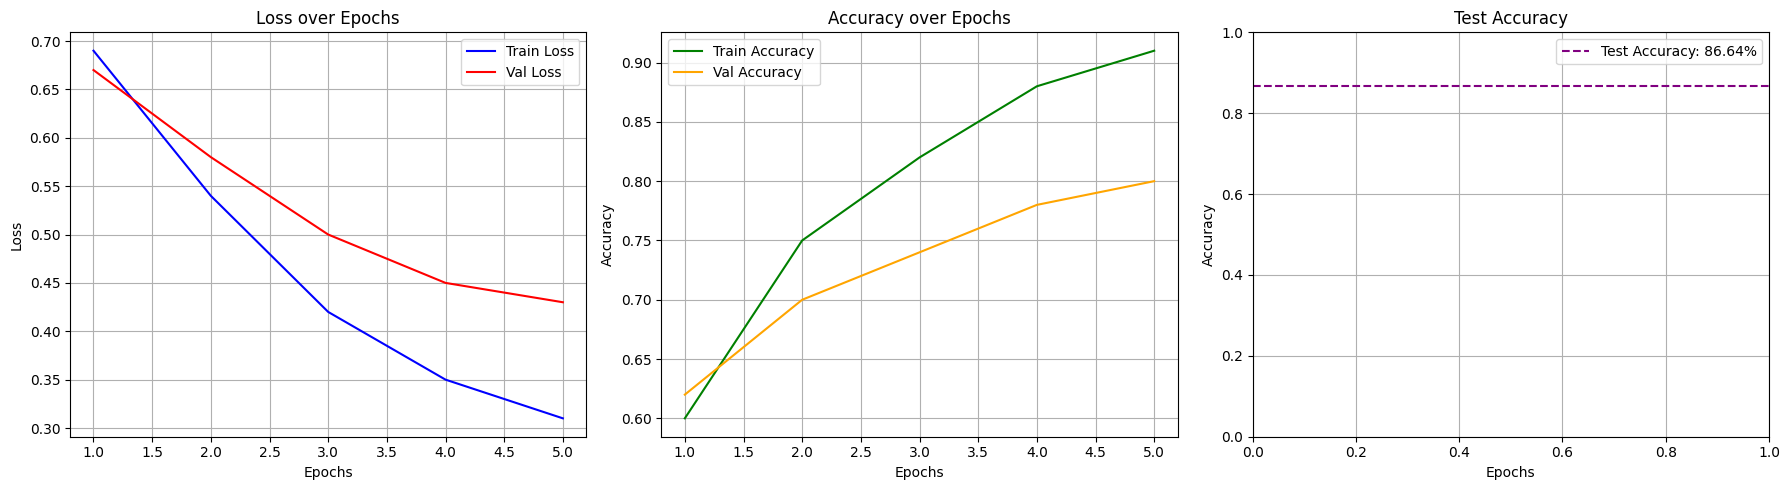

In [19]:
import matplotlib.pyplot as plt

# Get number of epochs
epochs = range(1, len(history['train_loss']) + 1)

plt.figure(figsize=(18, 5))

# 🔹 1. Training & Validation Loss
plt.subplot(1, 3, 1)
plt.plot(epochs, history['train_loss'], 'b-', label='Train Loss')
plt.plot(epochs, history['val_loss'], 'r-', label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 🔹 2. Training & Validation Accuracy
plt.subplot(1, 3, 2)
plt.plot(epochs, history['train_acc'], 'g-', label='Train Accuracy')
plt.plot(epochs, history['val_acc'], 'orange', label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# 🔹 3. Test Accuracy (as horizontal line)
test_acc = 0.8664  # replace with your actual test acc
plt.subplot(1, 3, 3)
plt.axhline(test_acc, color='purple', linestyle='--', label=f'Test Accuracy: {test_acc*100:.2f}%')
plt.title('Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [20]:
import os
import torch

# Define the save path and make sure directory exists
save_dir = 'model_checkpoints'
os.makedirs(save_dir, exist_ok=True)

save_path = os.path.join(save_dir, 'efficientnet_model.pth')

# Save model, optimizer, and training history
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_history': history,
    'epoch': epoch,  # last completed epoch
}, save_path)

print(f"✅ Model saved to: {save_path}")


✅ Model saved to: model_checkpoints/efficientnet_model.pth
